In [14]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup

import csv
import time
import pandas as pd
import requests
import numpy as np
import os
from datetime import datetime

PATH = "C:\Program Files (x86)\chromedriver.exe"

In [15]:
# pd.set_option('display.max_colwidth', -1)

In [16]:
url = "https://forums.hardwarezone.com.sg/threads/smus-rebranded-it-school-will-have-greater-focus-on-computing-and-coding.6448391/"
driver = webdriver.Chrome(PATH)
driver.get(url)

In [5]:
driver.title

WebDriverException: Message: chrome not reachable
  (Session info: chrome=99.0.4844.74)


Thread Title

In [ ]:
title = driver.find_element_by_class_name("p-title-value").text
print(title)

In [ ]:
nextButton = driver.find_element_by_class_name("pageNavSimple-el.pageNavSimple-el--next")

In [ ]:
nextButton.click()

In [ ]:
articles = driver.find_elements_by_class_name("message.message--post.js-post.js-inlineModContainer")
len(articles)

In [ ]:
i = 17

In [ ]:
articles[i].find_element_by_class_name("message-name").text

In [ ]:
articles[i].find_element_by_class_name("u-dt").text

In [ ]:
test1 = articles[i].find_element_by_class_name("bbWrapper").text
test1

In [ ]:
test2 = articles[i].find_element_by_class_name("bbCodeBlock.bbCodeBlock--expandable.bbCodeBlock--quote.js-expandWatch").text
test2[len(linked_post)+4:]

In [ ]:
test1[len(test2)+2:]

In [ ]:
forum_data = {}

In [17]:
urls = [
    "https://forums.hardwarezone.com.sg/threads/smus-rebranded-it-school-will-have-greater-focus-on-computing-and-coding.6448391/",
    "https://forums.hardwarezone.com.sg/threads/smu-is.4202272/",
    "https://forums.hardwarezone.com.sg/threads/smu-is-or-smu-biz.5064652/",
    "https://forums.hardwarezone.com.sg/threads/smu-sis-or-sit-information-communications-technology.5801729/",
    "https://forums.hardwarezone.com.sg/threads/information-systems-in-smu-vs-nus.5814561/",
    "https://forums.hardwarezone.com.sg/threads/smu-sis-or-sit-software-engineering.5844900/",
    "https://forums.hardwarezone.com.sg/threads/is-smu-information-systems-degree-widely-recognized-for-a-better-future.5605977/",
    "https://forums.hardwarezone.com.sg/threads/smu-information-systems-interview.2713965/"
]
print(len(urls))

8


In [18]:
scraped_data = []

In [34]:
driver = webdriver.Chrome(PATH)
driver.get(urls[7])

In [35]:

title = driver.find_element_by_class_name("p-title-value").text
articles = driver.find_elements_by_class_name("message.message--post.js-post.js-inlineModContainer")
for i in range(len(articles)):
    user = articles[i].find_element_by_class_name("message-name").text
    date = articles[i].find_element_by_class_name("u-dt").text
    thread_post = articles[i].find_element_by_class_name("bbWrapper").text
    try:
        articles[i].find_element_by_class_name("bbCodeBlock.bbCodeBlock--expandable.bbCodeBlock--quote.js-expandWatch")
        linked_post = articles[i].find_element_by_class_name("bbCodeBlock.bbCodeBlock--expandable.bbCodeBlock--quote.js-expandWatch").text
        thread_post = thread_post[len(linked_post)+2:]
    except:
        linked_post = "-"
    scraped_data.append([title, user,date,linked_post,thread_post])
try:
    driver.find_element_by_class_name("pageNavSimple-el.pageNavSimple-el--next")
    nextButton = driver.find_element_by_class_name("pageNavSimple-el.pageNavSimple-el--next")
except:
    nextButton = False
while(nextButton):
    nextButton.click()
    WebDriverWait(driver,100).until(
        EC.presence_of_element_located((By.CLASS_NAME,"message.message--post.js-post.js-inlineModContainer"))
    )
    articles = driver.find_elements_by_class_name("message.message--post.js-post.js-inlineModContainer")
    for i in range(len(articles)):
        user = articles[i].find_element_by_class_name("message-name").text
        date = articles[i].find_element_by_class_name("u-dt").text
        thread_post = articles[i].find_element_by_class_name("bbWrapper").text
        try:
            articles[i].find_element_by_class_name("bbCodeBlock.bbCodeBlock--expandable.bbCodeBlock--quote.js-expandWatch")
            linked_post = articles[i].find_element_by_class_name("bbCodeBlock.bbCodeBlock--expandable.bbCodeBlock--quote.js-expandWatch").text
            thread_post = thread_post[len(linked_post)+2:]
        except:
            linked_post = "-"
        scraped_data.append([title, user,date,linked_post,thread_post])
    try:
        driver.find_element_by_class_name("pageNavSimple-el.pageNavSimple-el--next")
        nextButton = driver.find_element_by_class_name("pageNavSimple-el.pageNavSimple-el--next")
    except:
        nextButton = False

In [36]:
print(scraped_data)

[["SMU's rebranded IT school will have greater focus on computing and coding", 'tripleg', 'Jan 15, 2021', '-', 'The renamed School of Computing and Information Systems (SCIS) at Singapore Management University (SMU) will now have a greater focus on computer science, intensive programming and technology development.\n\nFormerly known as the School Of Information Systems, SCIS will also almost double its annual enrolment of undergraduates from 276 to 520 this year.\n\nThis comes as SCIS launches more programmes that tap on team-based learning, which the school believes is essential for jobs in today\'s information technology (IT) industry.\n\nSMU’s education is known for its interactive, collaborative and project-based approach to learning.\n\nThe new name was announced on Friday (Jan 15) at SCIS and reflects the expanded aspirations and role of the school beyond information systems to include computing, said SMU.\n\nDuring the unveiling ceremony, SMU\'s president, Professor Lily Kong, s

In [38]:
filename = "HardwareZone_SIS.csv"
f = open(filename,"w")

In [39]:
check_file = open(filename,'r')
check_file.read()

''

In [40]:
df2 = pd.DataFrame(data = scraped_data, columns =["Thread Title","Username","post date","linked post","thread post"])
# df2.to_csv("HardwareZone_SIS.csv")

In [ ]:
df2

In [1]:
import pandas as pd
import numpy as np
# nltk - natural langauge processing
# wordcloud - for drawing word cloud
# matplotlib - for charting
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

df = pd.read_csv("HardwareZone_SIS.csv")
df.drop(columns = "Unnamed: 0", inplace = True)
df

,Thread Title,Username,post date,linked post,thread post,thread_post_processed
0,SMU's rebranded IT school will have greater fo...,tripleg,"Jan 15, 2021",,The renamed School of Computing and Informatio...,the renamed school of computing and informatio...
1,SMU's rebranded IT school will have greater fo...,sanzhu,"Jan 15, 2021",,Aoon will fizzle out kije biotech,aoon will fizzle out kije biotech
2,SMU's rebranded IT school will have greater fo...,Why so serious,"Jan 15, 2021",,Truckload of sica waiting to destroy these gre...,truckload of sica waiting to destroy these gre...
3,SMU's rebranded IT school will have greater fo...,jgyy1990,"Jan 15, 2021",,Didn't expect smu to be focused on tech.,didn't expect smu to be focused on tech
4,SMU's rebranded IT school will have greater fo...,PeanutButtor,"Jan 15, 2021",jgyy1990 said:\nDidn't expect smu to be focuse...,Cheap... imagine ceca lecturer doing teaching...,cheap imagine ceca lecturer doing teaching
...,...,...,...,...,...,...
416,SMU Information Systems Interview,snsdFTW,"Apr 8, 2013",,"Whole interview process as of 080413. ok guys,...",whole interview process as of 080413 ok guys g...
417,SMU Information Systems Interview,MrConfused,"Apr 9, 2013","snsdFTW said:\nok guys, gonna share with you m...",Are you from JC or poly? Do post when you rece...,are you from jc or poly do post when you recei...
418,SMU Information Systems Interview,DEATHFISH,"Apr 9, 2013",,"Anyone got a confirmed offer yet? Seriously, t...",anyone got a confirmed offer yet seriously the...
419,SMU Information Systems Interview,pika98,"Mar 25, 2014",,My friend shared the interview experience(2014...,my friend shared the interview experience(2014...


In [2]:
df = df.replace(np.nan, '', regex=True)
df = df.replace(r'[-]+', ' ', regex=True)
df = df.replace('NIL|nil|Nil', '', regex=True)
df = df.replace("\n\n",". ", regex = True)
df
# df3 = df3.replace(np.nan, '', regex=True)
# df3 = df3.replace(r'[-]+', ' ', regex=True)
# df3 = df3.replace('NIL|nil|Nil', '', regex=True)
# df3 = df3.replace("\n\n",". ", regex = True)
# df3

,Thread Title,Username,post date,linked post,thread post,thread_post_processed
0,SMU's rebranded IT school will have greater fo...,tripleg,"Jan 15, 2021",,The renamed School of Computing and Informatio...,the renamed school of computing and informatio...
1,SMU's rebranded IT school will have greater fo...,sanzhu,"Jan 15, 2021",,Aoon will fizzle out kije biotech,aoon will fizzle out kije biotech
2,SMU's rebranded IT school will have greater fo...,Why so serious,"Jan 15, 2021",,Truckload of sica waiting to destroy these gre...,truckload of sica waiting to destroy these gre...
3,SMU's rebranded IT school will have greater fo...,jgyy1990,"Jan 15, 2021",,Didn't expect smu to be focused on tech.,didn't expect smu to be focused on tech
4,SMU's rebranded IT school will have greater fo...,PeanutButtor,"Jan 15, 2021",jgyy1990 said:\nDidn't expect smu to be focuse...,Cheap... imagine ceca lecturer doing teaching...,cheap imagine ceca lecturer doing teaching
...,...,...,...,...,...,...
416,SMU Information Systems Interview,snsdFTW,"Apr 8, 2013",,"Whole interview process as of 080413. ok guys,...",whole interview process as of 080413 ok guys g...
417,SMU Information Systems Interview,MrConfused,"Apr 9, 2013","snsdFTW said:\nok guys, gonna share with you m...",Are you from JC or poly? Do post when you rece...,are you from jc or poly do post when you recei...
418,SMU Information Systems Interview,DEATHFISH,"Apr 9, 2013",,"Anyone got a confirmed offer yet? Seriously, t...",anyone got a confirmed offer yet seriously the...
419,SMU Information Systems Interview,pika98,"Mar 25, 2014",,My friend shared the interview experience(2014...,my friend shared the interview experience(2014...


In [3]:
df2 = df.copy()
df2
# Load the regular expression library
import re

# Remove punctuation
df2['thread_post_processed'] = df2['thread post'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
df2['thread_post_processed'] = df2['thread_post_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
df2['thread_post_processed']

0      the renamed school of computing and informatio...
1                      aoon will fizzle out kije biotech
2      truckload of sica waiting to destroy these gre...
3                didn't expect smu to be focused on tech
4             cheap imagine ceca lecturer doing teaching
                             ...                        
416    whole interview process as of 080413 ok guys g...
417    are you from jc or poly do post when you recei...
418    anyone got a confirmed offer yet seriously the...
419    my friend shared the interview experience(2014...
420    hello has anyone receive interview calls from ...
Name: thread_post_processed, Length: 421, dtype: object

In [8]:
df2['Thread Title'][df2['Thread Title'] != "SMU Information Systems Interview"]

0      SMU's rebranded IT school will have greater fo...
1      SMU's rebranded IT school will have greater fo...
2      SMU's rebranded IT school will have greater fo...
3      SMU's rebranded IT school will have greater fo...
4      SMU's rebranded IT school will have greater fo...
                             ...                        
126    Is SMU Information Systems degree widely recog...
127    Is SMU Information Systems degree widely recog...
128    Is SMU Information Systems degree widely recog...
129    Is SMU Information Systems degree widely recog...
130    Is SMU Information Systems degree widely recog...
Name: Thread Title, Length: 131, dtype: object

In [12]:
df3 = df2.iloc[:131,:]
df3

,Thread Title,Username,post date,linked post,thread post,thread_post_processed
0,SMU's rebranded IT school will have greater fo...,tripleg,"Jan 15, 2021",,The renamed School of Computing and Informatio...,the renamed school of computing and informatio...
1,SMU's rebranded IT school will have greater fo...,sanzhu,"Jan 15, 2021",,Aoon will fizzle out kije biotech,aoon will fizzle out kije biotech
2,SMU's rebranded IT school will have greater fo...,Why so serious,"Jan 15, 2021",,Truckload of sica waiting to destroy these gre...,truckload of sica waiting to destroy these gre...
3,SMU's rebranded IT school will have greater fo...,jgyy1990,"Jan 15, 2021",,Didn't expect smu to be focused on tech.,didn't expect smu to be focused on tech
4,SMU's rebranded IT school will have greater fo...,PeanutButtor,"Jan 15, 2021",jgyy1990 said:\nDidn't expect smu to be focuse...,Cheap... imagine ceca lecturer doing teaching...,cheap imagine ceca lecturer doing teaching
...,...,...,...,...,...,...
126,Is SMU Information Systems degree widely recog...,roborovsky,"Apr 23, 2017",,"The irony is based on GES, their mean & median...",the irony is based on ges their mean & median ...
127,Is SMU Information Systems degree widely recog...,nez,"Apr 23, 2017","roborovsky said:\nThe irony is based on GES, t...",What do You mean?,what do you mean
128,Is SMU Information Systems degree widely recog...,roborovsky,"Apr 24, 2017",,"Go to the nus ntu smu 2017/18 intake thread, r...",go to the nus ntu smu 2017/18 intake thread re...
129,Is SMU Information Systems degree widely recog...,zkillers,"Apr 24, 2017",,The GES reflects the current demands of the ec...,the ges reflects the current demands of the ec...


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,1), stop_words = 'english') # You can define your own parameters
X = cv.fit_transform(df2['thread_post_processed'])
Xc = (X.T * X) # This is the matrix manipulation step
Xc.setdiag(0) # We set the diagonals to be zeroes as it's pointless to be 1
import pandas as pd
names = cv.get_feature_names() # This are the entity names (i.e. keywords)
df = pd.DataFrame(data = Xc.toarray(), columns = names, index = names)
df.to_csv('to gephi.csv', sep = ',')

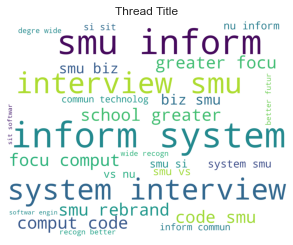

C:\Anaconda_File\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


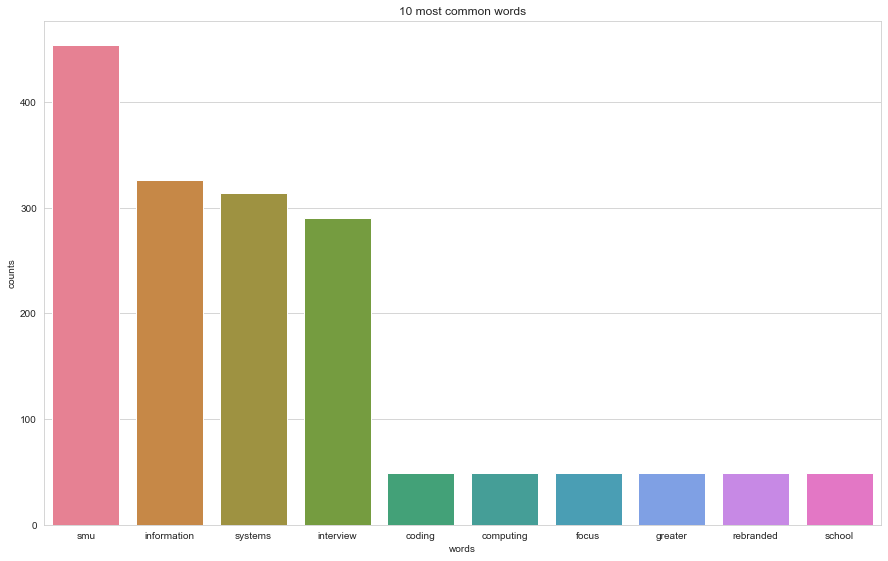

Topics found via LDA:

Topic #0:
smu systems information interview vs nus biz rebranded focus greater

Topic #1:
sit sis smu software engineering communications technology information systems interview

Topic #2:
smu rebranded coding school focus greater computing biz information systems

Topic #3:
smu information systems interview vs nus biz rebranded focus greater

Topic #4:
information smu technology communications systems widely recognized degree future better


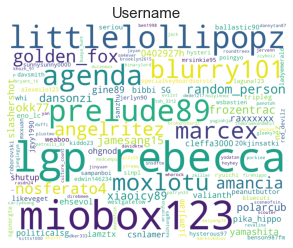

C:\Anaconda_File\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


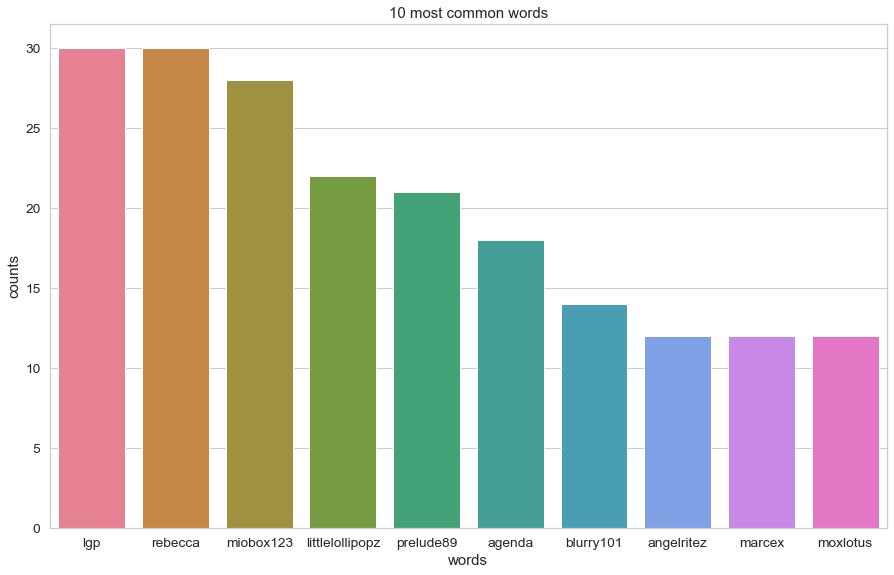

Topics found via LDA:

Topic #0:
rebecca lgp jamesang15 yamashita 0402927h valianth ehsevol hysteri red_devilz mxxuan

Topic #1:
agenda angelritez golden_fox amancia dansonzy frozentrace cleffa3000 pika_hippo kiddo23 alexmilo123

Topic #2:
prelude89 blurry101 moxlotus nosferato4 slashershot sg bibby csnlamer politicalsg poingyo

Topic #3:
polarcubs nez iamztx shutup jiamjiam bluecutie likevegetable ladyemerald jerlyn90 hysterous97

Topic #4:
miobox123 littlelollipopz marcex random_person okk77 xiaoicy89 raxxxxxx gine89 ohgnod specialkeyboardservice


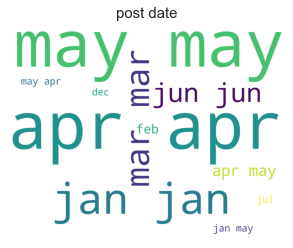

C:\Anaconda_File\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


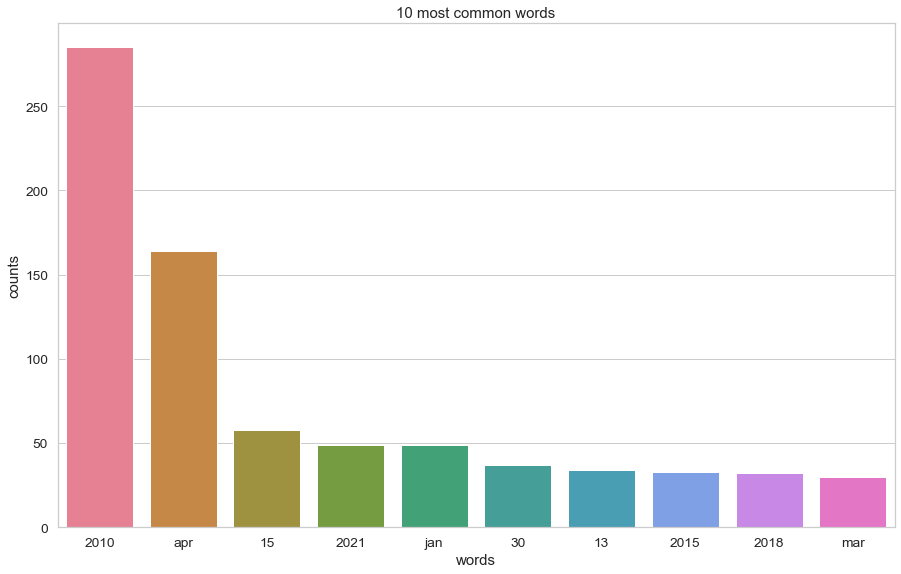

Topics found via LDA:

Topic #0:
2010 13 apr jun 10 2013 11 18 20 19

Topic #1:
apr 2010 22 12 28 26 2017 27 2019 11

Topic #2:
30 2015 2018 24 apr 14 jun 2017 11 2010

Topic #3:
mar 2018 31 2010 29 30 2015 2014 25 20

Topic #4:
15 2021 jan 23 17 21 dec 2019 2017 2013


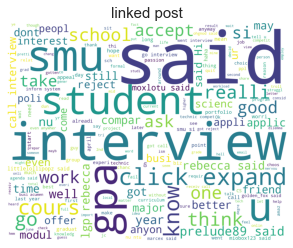

C:\Anaconda_File\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


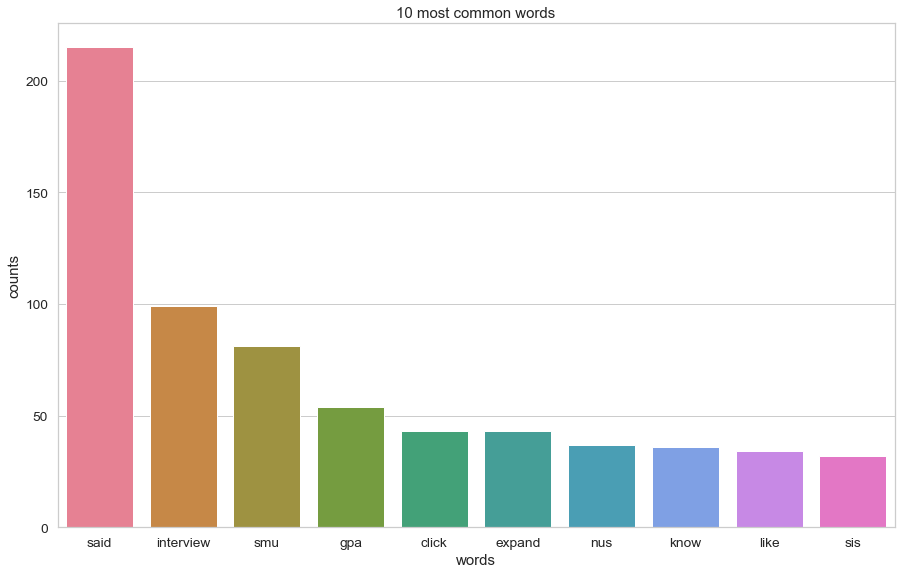

Topics found via LDA:

Topic #0:
said nus interview smu really formal better school guys agenda

Topic #1:
said interview smu year just ve nus good click expand

Topic #2:
said rebecca lgp interview calls going gpa think april good

Topic #3:
said gpa smu interview sis got expand click know like

Topic #4:
said students technical business course know smu poly student tell


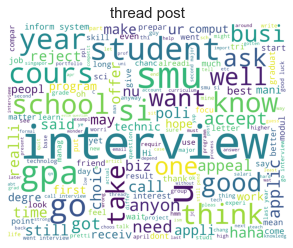

C:\Anaconda_File\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


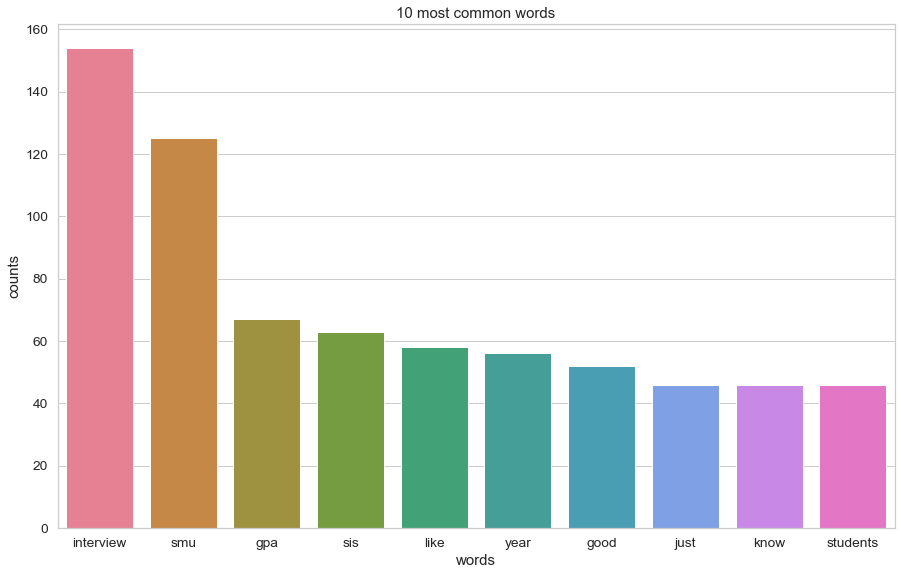

Topics found via LDA:

Topic #0:
interview smu know year got sis did good think nus

Topic #1:
interview gpa like just smu good poly students don going

Topic #2:
got course year interview good luck like just poly biz

Topic #3:
interview smu ask appeal letter sis rejected write blah yup

Topic #4:
smu school business sis information nus systems computing students focus


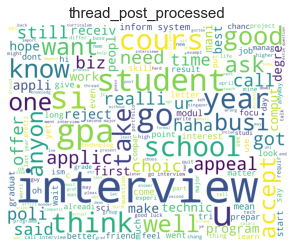

C:\Anaconda_File\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


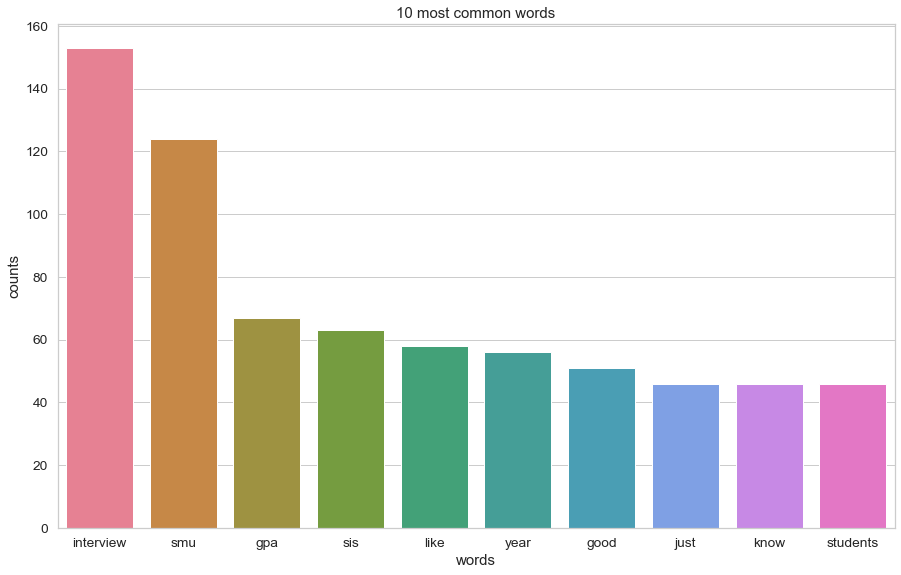

Topics found via LDA:

Topic #0:
interview rejected choice did just think smu year haha good

Topic #1:
gpa smu interview got good april nus dont need pending

Topic #2:
smu school sis students business information nus computing focus systems

Topic #3:
interview like sis smu year gpa know going got ask

Topic #4:
interview course ur like good oh went year students luck


In [4]:

stop_words = stopwords.words('english')
stop_words.extend(['congrats', 'lol', 'yup', 'thanks', 'nope', 
                       'http', 'www', 'com', 'https','amp', 'sg', 
                       'reddit', 'gt', 'la','lor', 'le', 'leh', 'smu', 'ntu' , 'nus'])

import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

for (columnName, columnData) in df2.iteritems():
    qn_content = ''
    for line in df2[columnName]:
        if len(line.strip()) > 0: # Eliminates empty answers
            qn_content += line + ' '    
    
    # Tokenize Words
    tokenizer = RegexpTokenizer(r'\w+')
    words_content = tokenizer.tokenize(qn_content)  # All answers for that question into words
    #print(words_content)
    #print(len(words_content))
    
    # Remove stop words
    words_filtered = []
    for w in words_content:
        if w not in stop_words:
            words_filtered.append(w)
            
    #print(words_filtered)
    #print(len(words_filtered))
    
    # Porter Stemmer
    porter_stemmer = PorterStemmer()
    
    words_stemmed = []
    for w in words_filtered:
        words_stemmed.append(porter_stemmer.stem(w))
        
    #print(words_stemmed)
    
    # WordCloud
    words_joined = " ".join([w for w in words_stemmed])

    # Create a word cloud
    my_wordcloud = WordCloud(background_color='white',
                         width=1800,
                         height=1400).generate(words_joined)

    plt.imshow(my_wordcloud)
    plt.axis('off')
    plt.title(columnName)
    plt.show()
    # plt.savefig(columnName, dpi=300)
    # Initialise the count vectorizer with the English stop words
    count_vectorizer = CountVectorizer(stop_words='english')

    # Fit and transform the processed titles
    count_data = count_vectorizer.fit_transform(df2[columnName])

    # Visualise the 10 most common words
    plot_10_most_common_words(count_data, count_vectorizer)
    
    # Tweak the two parameters below (use int values below 15)
    number_topics = 5
    number_words = 10

    # Create and fit the LDA model
    lda = LDA(n_components=number_topics)
    lda.fit(count_data)

    # Print the topics found by the LDA model
    print("Topics found via LDA:")
    print_topics(lda, count_vectorizer, number_words)
    

#     from pyLDAvis import sklearn as sklearn_lda
#     import pickle 
#     import pyLDAvis

#     # Visualize the topics
#     pyLDAvis.enable_notebook()

#     LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))
#     # # this is a bit time consuming - make the if statement True
#     # # if you want to execute visualization prep yourself
#     if 1 == 1:

#         LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)

#         with open(LDAvis_data_filepath, 'w') as f:
#             pickle.dump(LDAvis_prepared, f)

#     # load the pre-prepared pyLDAvis data from disk
#     with open(LDAvis_data_filepath) as f:
#         LDAvis_prepared = pickle.load(f)

#     pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

#     LDAvis_prepared

In [52]:
df2.to_csv("HardwareZone_SIS.csv")

In [53]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews
import collections
from collections import defaultdict
import numpy as np
from nltk.corpus import stopwords
import pandas as pd

In [54]:
# Define 80%/20% split for Training/Testing
SPLIT = 0.8

# Stop Words filtering
stopset = set(stopwords.words('english'))

In [ ]:
def word_feats(words):
    feats = defaultdict(lambda: False)
    for word in words:
        # Filter out Stop Words
        if word not in stopset:
            feats[word] = True
    return feats


def evaluate_classifier():

    # Let's go to IMDB movie dataset and obtain IDs.
    # IDs of those movies with POSITIVE sentiment label.
    # IDs of those movies with NEGATIVE sentiment label.
    negids = movie_reviews.fileids('neg')
    posids = movie_reviews.fileids('pos')

    # Remember "Bag of Words"?
    # We're going to generate that bag-of-words "feature set".
    negfeats = [(word_feats(movie_reviews.words(fileids=[f])), 'neg') for f in negids]
    posfeats = [(word_feats(movie_reviews.words(fileids=[f])), 'pos') for f in posids]

    # Now, we need to split our dataset into 80% training and 20% testing.
    cutoff = int(len(posfeats) *SPLIT)
    trainfeats = negfeats[:cutoff] + posfeats[:cutoff]
    testfeats = negfeats[cutoff:] + posfeats[cutoff:]

    # Let's see how many data points we have in TRAINING dataset and in TESTING dataset.
    print ('Train on %d instances\nTest on %d instances' % (len(trainfeats), len(testfeats)))

    ##### OKAY, we're done with feature preparation ######

    ##### We're ready to build a Naive Bayes classifier #####
    # Let's train our model - based on the TRAINING dataset
    classifier = NaiveBayesClassifier.train(trainfeats)
    # Now let's feed in TESTING dataset and compute accuracy
    print ('Accuracy:', nltk.classify.util.accuracy(classifier, testfeats))

    # Which features were most informative?
    classifier.show_most_informative_features()

    # Now, let's draw a confusion matrix
    pos = [classifier.classify(fs) for (fs, l) in posfeats[cutoff:]]
    pos = np.array(pos)
    neg = [classifier.classify(fs) for (fs, l) in negfeats[cutoff:]]
    neg = np.array(neg)

    # We're done classifying... let's see the results
    print ('Confusion Matrix')
    print ('\t\t', 'Predicted Class')
    print ('-'*40)

    print ('|\t %d (TP) \t|\t %d (FN) \t| Actual class' % ((pos == 'pos').sum(), (pos == 'neg').sum()))
    print ('|\t %d (FP) \t|\t %d (TN) \t|' % ((neg == 'pos').sum(), (neg == 'neg').sum()))

    print ('-'*40)

In [58]:
import nltk
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'pyLDAvis.gensim'

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])